# 1. Explorar las ofertas relámpago, ¿qué insights puedes generar?
---
## Descripción
En conjunto con el desafío te compartimos un archivo llamado ofertas_relampago.csv el cual posee información de los resultados de ofertas del tipo relampago para un periodo de tiempo y un país determinado.

Es decir, son ofertas que tienen una duración definida de algunas horas y un porcentaje de unidades (stock) comprometidas.
 - El objetivo de este desafío es hacer un EDA sobre estos datos buscando insights sobre este tipo de ofertas.
Las columnas del dataset son autoexplicativas pero puedes preguntarnos cualquier duda.
## Entregable
El entregable de este desafío es una Jupyter notebook con el EDA.

In [1]:
import pandas as pd
from ydata_profiling import ProfileReport

from utils import split_delta_components

Cargar información de ofertas relámpago y generar informe usando `pandas-profiling` (ahora ydata_profiling)

In [102]:
df = pd.read_csv('data/ofertas_relampago.csv')

In [103]:
# Transformar fechas de str a datetime
df['OFFER_START_DATE'] = pd.to_datetime(df['OFFER_START_DATE'])
df['OFFER_START_DTTM'] = pd.to_datetime(df['OFFER_START_DTTM'])
df['OFFER_FINISH_DTTM'] = pd.to_datetime(df['OFFER_FINISH_DTTM'])
# Se encuentran valores negativos en variable 'REMAINING_STOCK_AFTER_END', se pasa a cero si es negativo
#df['REMAINING_STOCK_AFTER_END'] = df['REMAINING_STOCK_AFTER_END'].mask(df['REMAINING_STOCK_AFTER_END'] < 0,0)
# Calculo de porcentaje vendido
df['STOCK_SOLD_PR'] = (df['INVOLVED_STOCK'] - df['REMAINING_STOCK_AFTER_END'])*100/df['INVOLVED_STOCK']
# Establecer día de la semana
df['WEEKDAY'] = df['OFFER_START_DATE'].dt.dayofweek
# Generar DeltaTime entre incio y fin de la oferta
df['OFFER_DURATION_DTTM'] = df['OFFER_FINISH_DTTM']-df['OFFER_START_DTTM']
# Generar variables de días, horas, minutos y segundos respecto al DeltaTime
#df['OFFER_DURATION_DAYS'] = df['OFFER_DURATION_DTTM'].apply(lambda x: split_delta_components(x,'d')) # NO APORTA
df['OFFER_DURATION_HOURS'] = df['OFFER_DURATION_DTTM'].apply(lambda x: split_delta_components(x,'h'))
#df['OFFER_DURATION_MINUTES'] = df['OFFER_DURATION_DTTM'].apply(lambda x: split_delta_components(x,'m')) # NO APORTA
#df['OFFER_DURATION_SECONDS'] = df['OFFER_DURATION_DTTM'].apply(lambda x: split_delta_components(x,'s')) # NO APORTA
df['VERTICAL'] = df['VERTICAL'].astype('category')
# Limpiar variable DeltaTime
df = df.drop(['OFFER_DURATION_DTTM'], axis=1)
df = df.dropna(how='any', axis=1)
# Remover columnas con valores constantes
df = df.loc[:, (df != df.iloc[0]).any()]
df = df.drop_duplicates()

In [107]:
df.mask(df['STOCK_SOLD_PR']>1400)

,OFFER_START_DATE,OFFER_START_DTTM,OFFER_FINISH_DTTM,INVOLVED_STOCK,REMAINING_STOCK_AFTER_END,SHIPPING_PAYMENT_TYPE,DOM_DOMAIN_AGG1,VERTICAL,DOMAIN_ID,STOCK_SOLD_PR,WEEKDAY,OFFER_DURATION_HOURS
0,2021-06-22,2021-06-22 16:00:00+00:00,2021-06-22 23:02:43+00:00,4.0,-2.0,none,PETS FOOD,CPG,MLM-BIRD_FOODS,150.000000,1.0,7.0
1,2021-06-22,2021-06-22 13:00:00+00:00,2021-06-22 19:00:02+00:00,5.0,5.0,free_shipping,PET PRODUCTS,OTHERS,MLM-ANIMAL_AND_PET_PRODUCTS,0.000000,1.0,6.0
2,2021-06-22,2021-06-22 07:00:00+00:00,2021-06-22 13:00:01+00:00,15.0,12.0,none,COMPUTERS,CE,MLM-SPEAKERS,20.000000,1.0,6.0
3,2021-06-22,2021-06-22 19:00:00+00:00,2021-06-23 01:36:12+00:00,15.0,13.0,none,COMPUTERS,CE,MLM-HEADPHONES,13.333333,1.0,6.0
4,2021-06-22,2021-06-22 13:00:00+00:00,2021-06-22 15:48:12+00:00,15.0,0.0,none,COMPUTERS,CE,MLM-HEADPHONES,100.000000,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
48741,2021-06-19,2021-06-19 13:00:00+00:00,2021-06-19 19:00:01+00:00,15.0,9.0,none,HOME&DECOR,HOME & INDUSTRY,MLM-CHRISTMAS_LIGHTS,40.000000,5.0,6.0
48742,2021-06-19,2021-06-19 13:00:00+00:00,2021-06-19 19:00:01+00:00,5.0,5.0,free_shipping,HOME&DECOR,HOME & INDUSTRY,MLM-DECORATIVE_PAINTINGS,0.000000,5.0,6.0
48743,2021-06-19,2021-06-19 07:00:00+00:00,2021-06-19 13:00:03+00:00,5.0,3.0,free_shipping,HOME&DECOR,HOME & INDUSTRY,MLM-INDOOR_CURTAINS_AND_BLINDS,40.000000,5.0,6.0
48744,2021-06-19,2021-06-19 13:00:00+00:00,2021-06-19 19:00:00+00:00,5.0,1.0,free_shipping,HOME&DECOR,HOME & INDUSTRY,MLM-INDOOR_CURTAINS_AND_BLINDS,80.000000,5.0,6.0


In [97]:
profile = ProfileReport(df, lazy=False, title="EDA Oferta Relampago", dark_mode=True)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

In [98]:
profile.to_notebook_iframe()

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [99]:
profile.to_file("EDA_Oferta_Relampago.html")

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

<Axes: xlabel='STOCK_SOLD_PR', ylabel='VERTICAL'>

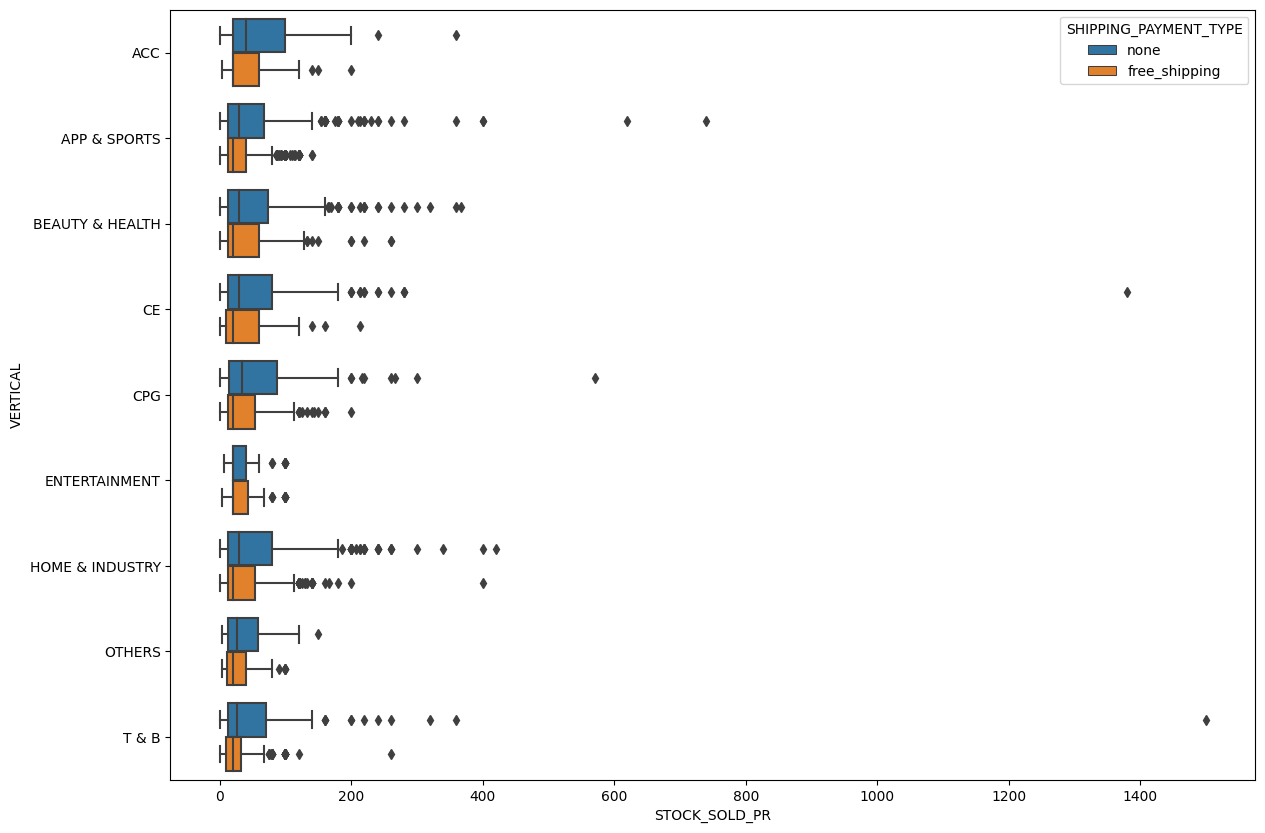

In [100]:
%matplotlib inline
import seaborn as sns

temp_df = df[df['STOCK_SOLD_PR'] != 0]
sns.boxplot(data=temp_df, y="VERTICAL", x="STOCK_SOLD_PR", hue='SHIPPING_PAYMENT_TYPE')


A continuación se revisara información de las carácteristicas de las ofertas. Se inicia con duración

<Axes: xlabel='STOCK_SOLD_PR', ylabel='DOM_DOMAIN_AGG1'>

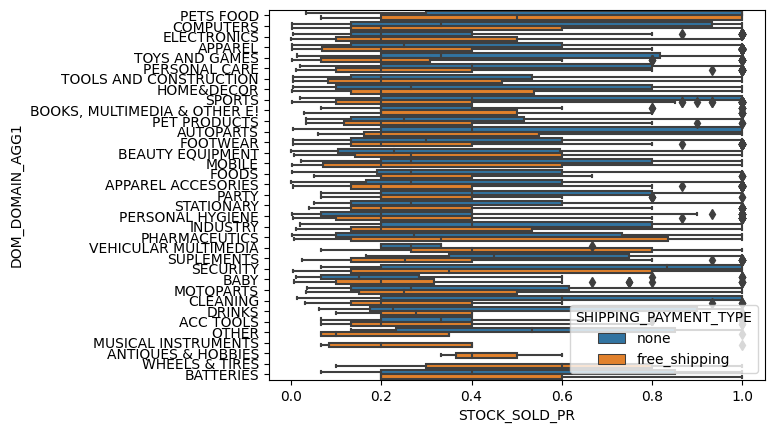

In [76]:
%matplotlib inline
import seaborn as sns

temp_df = df[df['STOCK_SOLD_PR'] != 0]
sns.boxplot(data=temp_df, y="DOM_DOMAIN_AGG1", x="STOCK_SOLD_PR", hue='SHIPPING_PAYMENT_TYPE')

In [53]:
df

,OFFER_START_DATE,OFFER_START_DTTM,OFFER_FINISH_DTTM,OFFER_TYPE,INVOLVED_STOCK,REMAINING_STOCK_AFTER_END,SOLD_AMOUNT,SOLD_QUANTITY,ORIGIN,SHIPPING_PAYMENT_TYPE,DOM_DOMAIN_AGG1,VERTICAL,DOMAIN_ID,OFFER_DURATION_DAYS,OFFER_DURATION_HOURS,OFFER_DURATION_MINUTES,OFFER_DURATION_SECONDS
0,2021-06-22,2021-06-22 16:00:00+00:00,2021-06-22 23:02:43+00:00,lightning_deal,4,-2,4.72,6.0,A,none,PETS FOOD,CPG,MLM-BIRD_FOODS,0,7,2,43
1,2021-06-22,2021-06-22 13:00:00+00:00,2021-06-22 19:00:02+00:00,lightning_deal,5,5,NaN,NaN,NaN,free_shipping,PET PRODUCTS,OTHERS,MLM-ANIMAL_AND_PET_PRODUCTS,0,6,0,2
2,2021-06-22,2021-06-22 07:00:00+00:00,2021-06-22 13:00:01+00:00,lightning_deal,15,12,10.73,3.0,NaN,none,COMPUTERS,CE,MLM-SPEAKERS,0,6,0,1
3,2021-06-22,2021-06-22 19:00:00+00:00,2021-06-23 01:36:12+00:00,lightning_deal,15,13,7.03,2.0,NaN,none,COMPUTERS,CE,MLM-HEADPHONES,0,6,36,12
4,2021-06-22,2021-06-22 13:00:00+00:00,2021-06-22 15:48:12+00:00,lightning_deal,15,0,39.65,15.0,NaN,none,COMPUTERS,CE,MLM-HEADPHONES,0,2,48,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48741,2021-06-19,2021-06-19 13:00:00+00:00,2021-06-19 19:00:01+00:00,lightning_deal,15,9,16.28,6.0,NaN,none,HOME&DECOR,HOME & INDUSTRY,MLM-CHRISTMAS_LIGHTS,0,6,0,1
48742,2021-06-19,2021-06-19 13:00:00+00:00,2021-06-19 19:00:01+00:00,lightning_deal,5,5,NaN,NaN,NaN,free_shipping,HOME&DECOR,HOME & INDUSTRY,MLM-DECORATIVE_PAINTINGS,0,6,0,1
48743,2021-06-19,2021-06-19 07:00:00+00:00,2021-06-19 13:00:03+00:00,lightning_deal,5,3,16.62,2.0,NaN,free_shipping,HOME&DECOR,HOME & INDUSTRY,MLM-INDOOR_CURTAINS_AND_BLINDS,0,6,0,3
48744,2021-06-19,2021-06-19 13:00:00+00:00,2021-06-19 19:00:00+00:00,lightning_deal,5,1,38.79,4.0,NaN,free_shipping,HOME&DECOR,HOME & INDUSTRY,MLM-INDOOR_CURTAINS_AND_BLINDS,0,6,0,0
